In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

from re_forecast.data.get_data import get_rte_units_names, get_rte_data
from re_forecast.preprocessing.datetime import format_to_datetime, construct_time_consistent_df, check_dates_consistency, plot_consecutive_time_periods

# Preprocessing step 2

The goals of this notebooks are :  
- Quantify the missing values among the wind offshore generation units, find the generation unit with the less missing datas  
- Find out how to deal with missing values in time series  
- Try out multiple techniques of imputation for the choosen generation unit  
- Choose the best technique of imputation with the best parameters  
- Package all the functions and construct the impute missing values module

## Qantify missing values among wind offshore generation units

In [2]:
#########################################################
# 1/ Download all the generation units for ressource n2 #
#########################################################

# Set the parameters
ressource_nb = 2
start_date = "2022-06-01 00:00:00" # Note: don't modify the start & end date for following requests
end_date = "2024-03-01 00:00:00"
eic_code = None
production_type = None
production_subtype = None

# Download generation data: don't forget to set the api_delay_bypass to true in the params in this case,
# and to reset it to false if you know that you will download fresh data from the api
ressource_2_gen_data = get_rte_data(ressource_nb = ressource_nb,
                                    start_date = start_date,
                                    end_date = end_date,
                                    eic_code = eic_code,
                                    production_type = production_type,
                                    production_subtype = production_subtype)

################################################
# 2/ Download the units names for ressource n2 #
################################################

ressource_2_units = get_rte_units_names(ressource_nb = ressource_nb)

In [3]:
display(ressource_2_gen_data)
display(ressource_2_units)

,start_date,end_date,updated_date,value,eic_code
0,2022-06-02T00:00:00+02:00,2022-06-02T01:00:00+02:00,2022-06-03T00:46:23+02:00,0.0,17W100P100P00016
1,2022-06-02T01:00:00+02:00,2022-06-02T02:00:00+02:00,2022-06-03T00:46:24+02:00,0.0,17W100P100P00016
2,2022-06-02T02:00:00+02:00,2022-06-02T03:00:00+02:00,2022-06-03T00:46:25+02:00,-1.0,17W100P100P00016
3,2022-06-02T03:00:00+02:00,2022-06-02T04:00:00+02:00,2022-06-03T00:46:26+02:00,-1.0,17W100P100P00016
4,2022-06-02T04:00:00+02:00,2022-06-02T05:00:00+02:00,2022-06-03T00:46:26+02:00,0.0,17W100P100P00016
...,...,...,...,...,...
1886295,2024-02-29T19:00:00+01:00,2024-02-29T20:00:00+01:00,2024-02-29T20:26:10+01:00,52.0,17W100P100P3382R
1886296,2024-02-29T20:00:00+01:00,2024-02-29T21:00:00+01:00,2024-02-29T21:23:57+01:00,47.0,17W100P100P3382R
1886297,2024-02-29T21:00:00+01:00,2024-02-29T22:00:00+01:00,2024-02-29T22:28:58+01:00,51.0,17W100P100P3382R
1886298,2024-02-29T22:00:00+01:00,2024-02-29T23:00:00+01:00,2024-02-29T23:24:01+01:00,55.0,17W100P100P3382R


,eic_code,name,production_type
0,17W000001023725I,FR_LANDIVISIAUGU,FOSSIL_GAS
1,17W000001418626A,CPCU-CogeVitry–GP,FOSSIL_GAS
2,17W0000014186456,CPCU-StOuen-GP,FOSSIL_GAS
3,17W0000014455651,BANC DE GUERANDE 1,WIND_OFFSHORE
4,17W000001445567Y,BANC DE GUERANDE 2,WIND_OFFSHORE
...,...,...,...
138,17W100P100P0361D,BATHIE 6,HYDRO_WATER_RESERVOIR
139,17W100P100P03655,PROVENCE 4 BIOMASSE,BIOMASS
140,17W100P100P0842Y,A1 DE PARC EOLIEN EN MER DE LA BAIE DE ST-BRIEUC,WIND_OFFSHORE
141,17W100P100P20746,COCHE 5,HYDRO_PUMPED_STORAGE


/home/bender/Code/DridrM/personal_data_projects/renewable_energy_forecast/re_forecast/preprocessing/datetime.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df.loc[:, dt_column] = gen_df[dt_column].apply(handle_seasonal_time)


Missing values analysis for unit ['BANC DE GUERANDE 1']


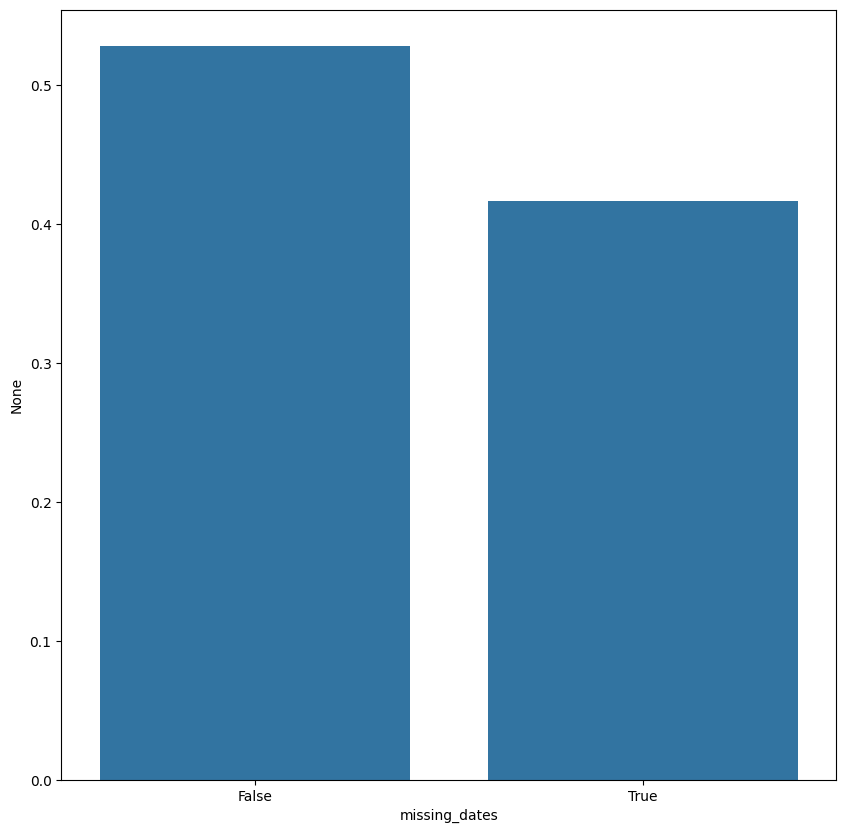

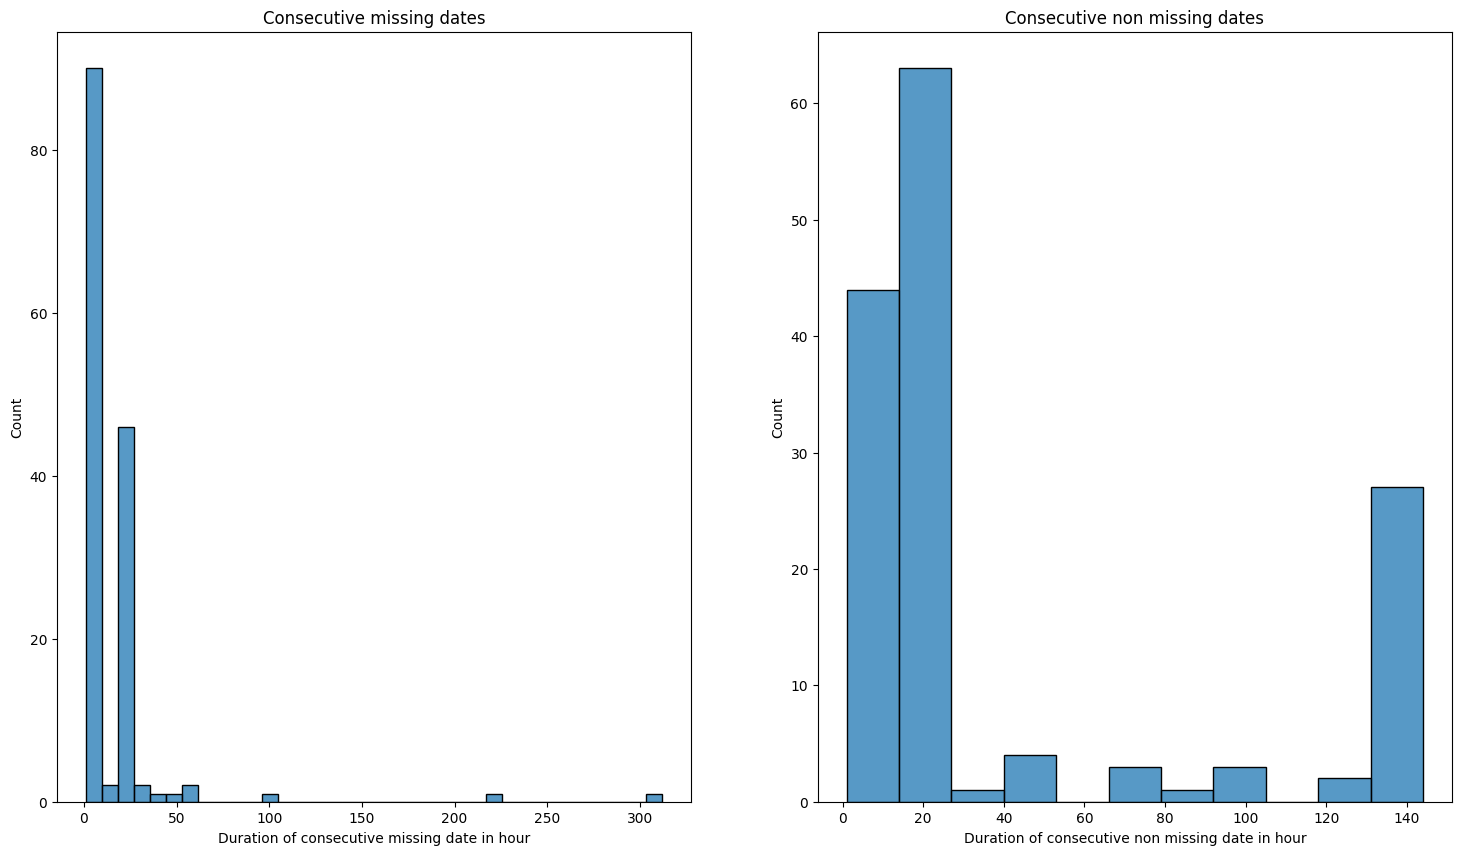

/home/bender/Code/DridrM/personal_data_projects/renewable_energy_forecast/re_forecast/preprocessing/datetime.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df.loc[:, dt_column] = gen_df[dt_column].apply(handle_seasonal_time)


Missing values analysis for unit ['BANC DE GUERANDE 2']


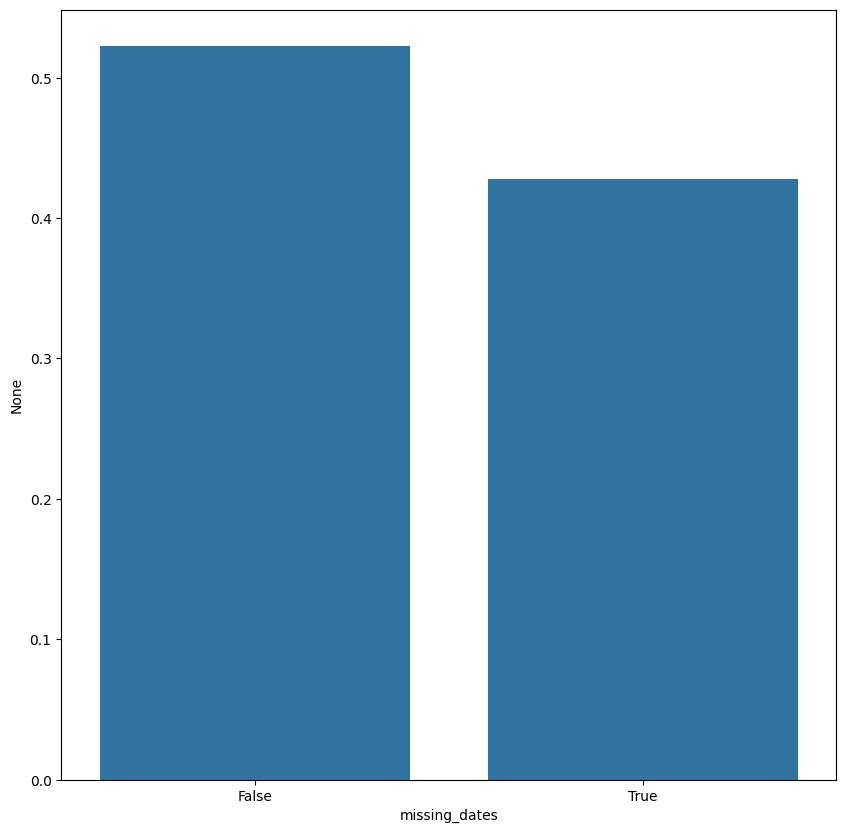

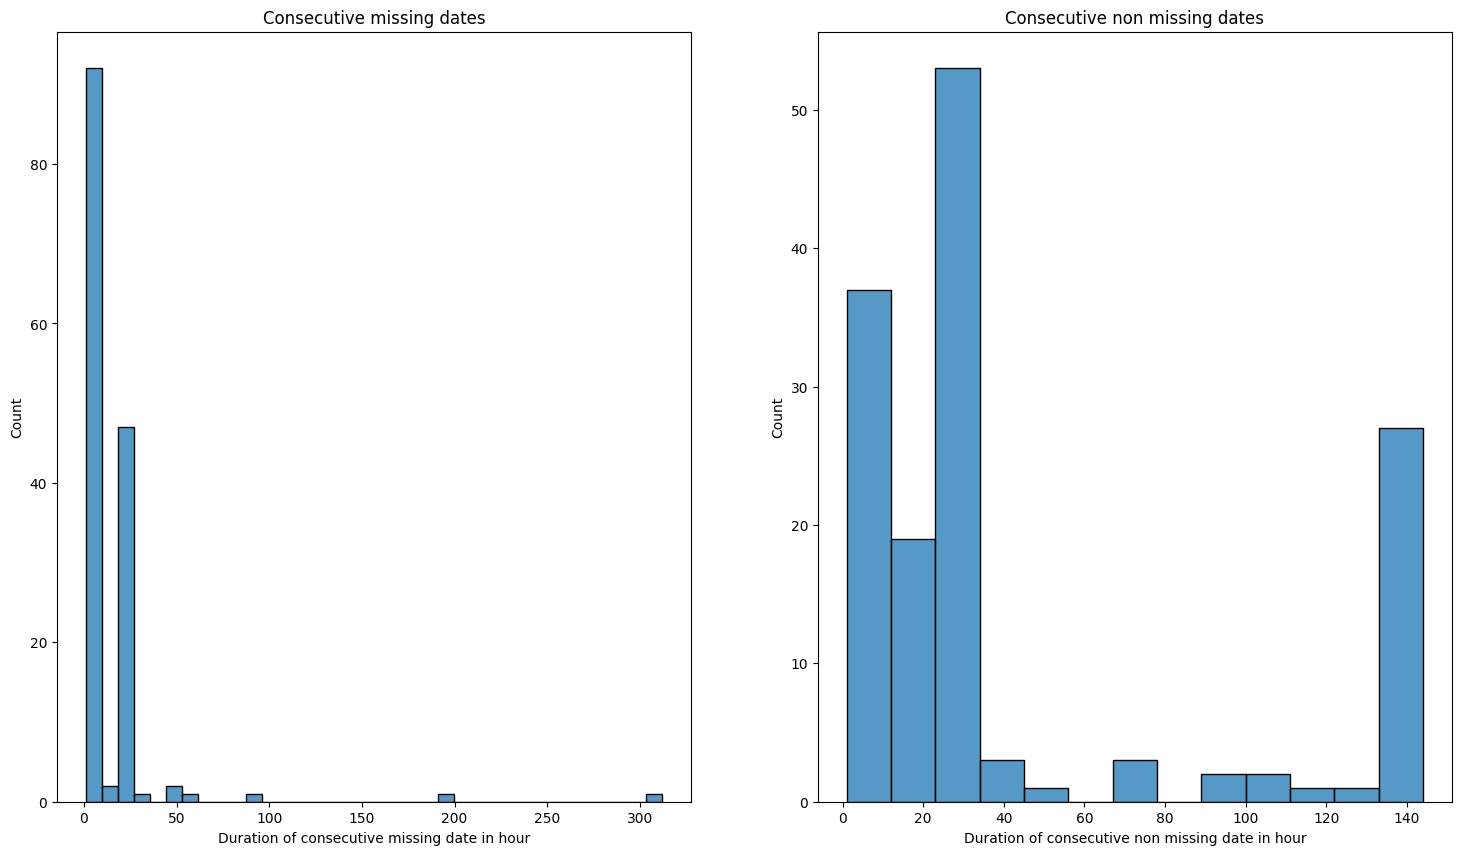

Missing values analysis for unit ['FECAMP 1']


/home/bender/Code/DridrM/personal_data_projects/renewable_energy_forecast/re_forecast/preprocessing/datetime.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df.loc[:, dt_column] = gen_df[dt_column].apply(handle_seasonal_time)


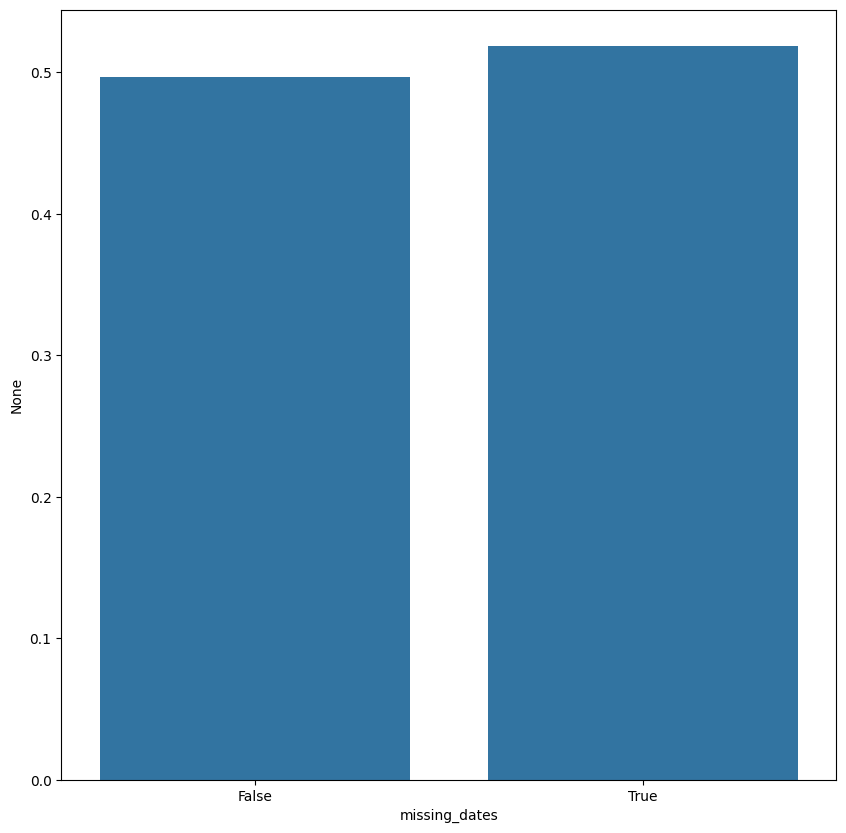

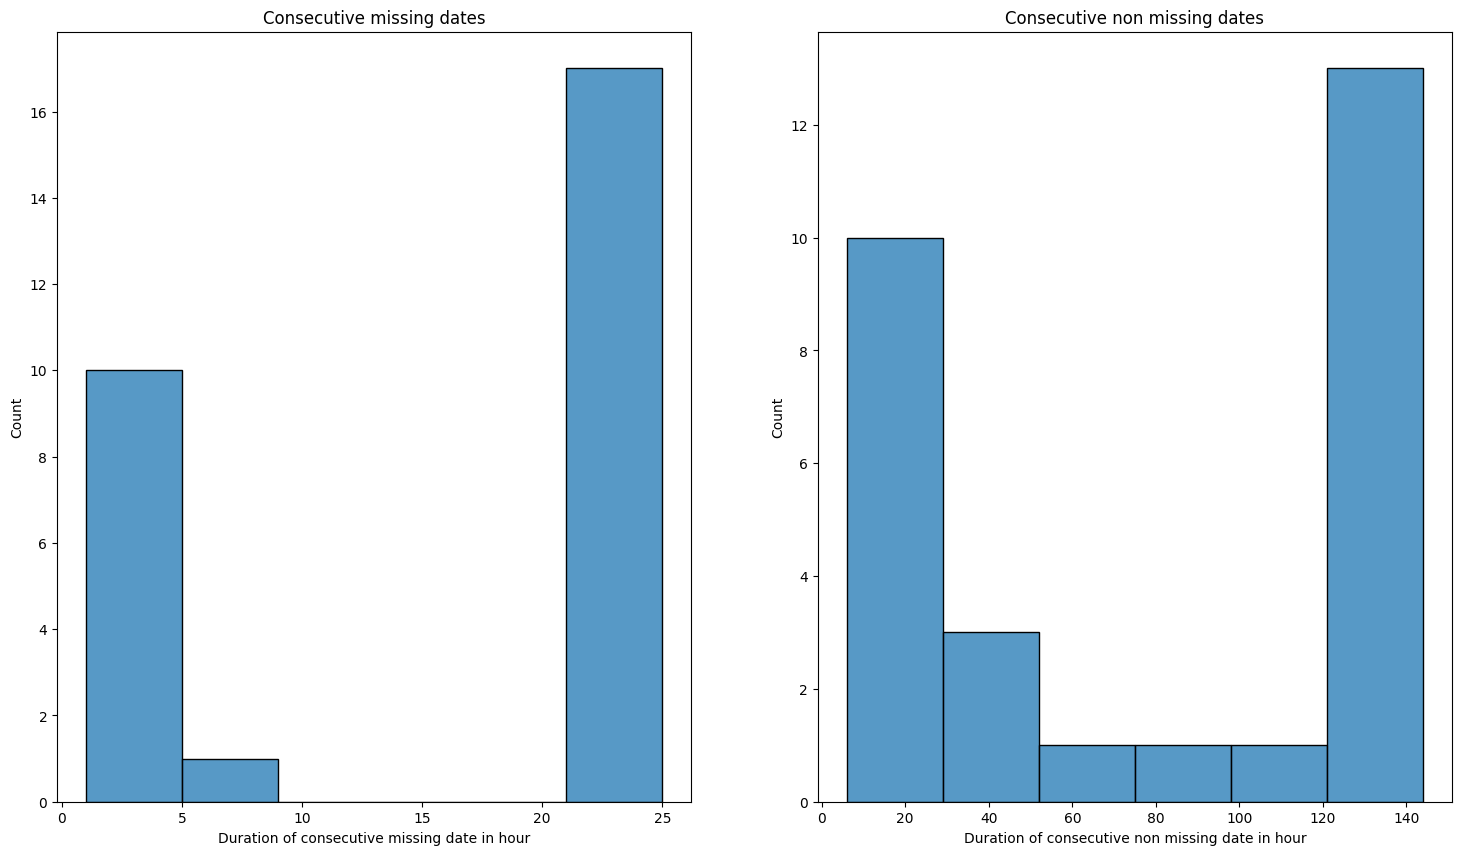

Missing values analysis for unit ['FECAMP 2']


/home/bender/Code/DridrM/personal_data_projects/renewable_energy_forecast/re_forecast/preprocessing/datetime.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df.loc[:, dt_column] = gen_df[dt_column].apply(handle_seasonal_time)


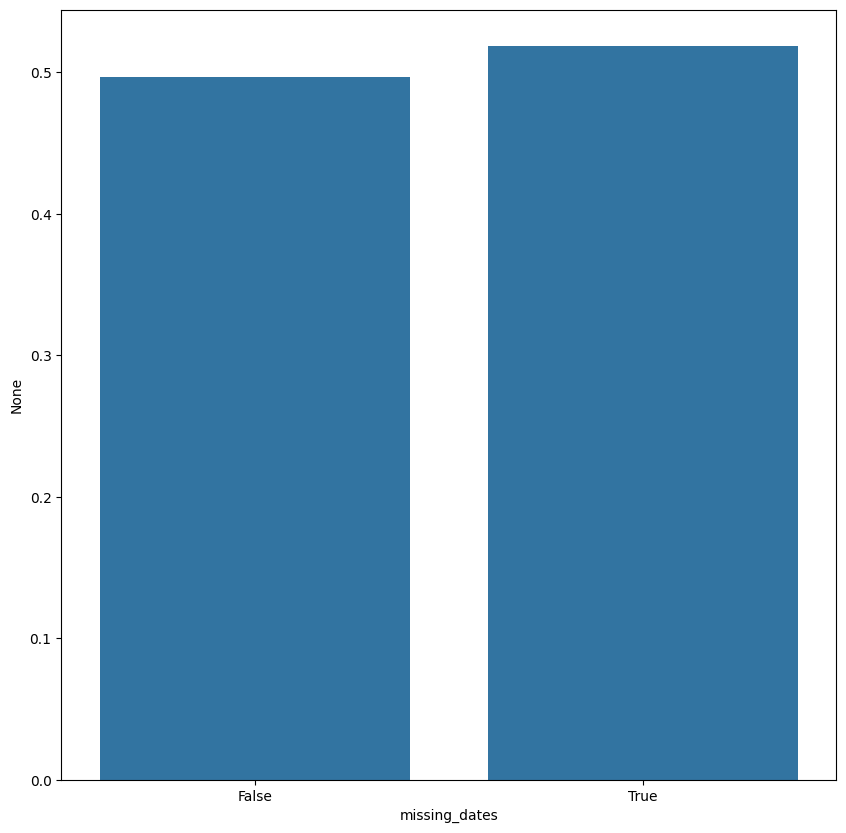

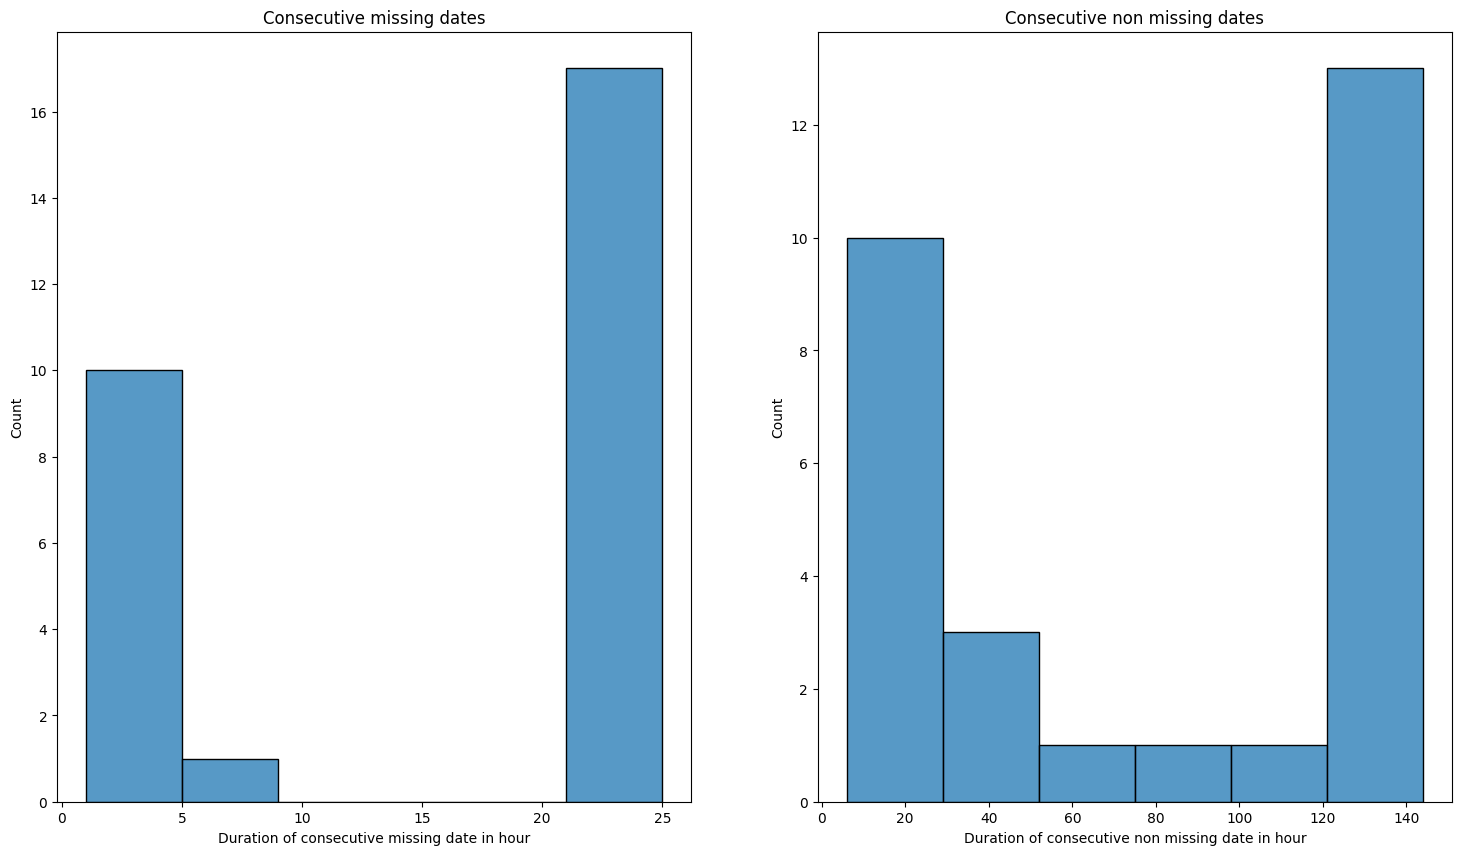

Missing values analysis for unit ['A1 DE PARC EOLIEN EN MER DE LA BAIE DE ST-BRIEUC']


/home/bender/Code/DridrM/personal_data_projects/renewable_energy_forecast/re_forecast/preprocessing/datetime.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df.loc[:, dt_column] = gen_df[dt_column].apply(handle_seasonal_time)


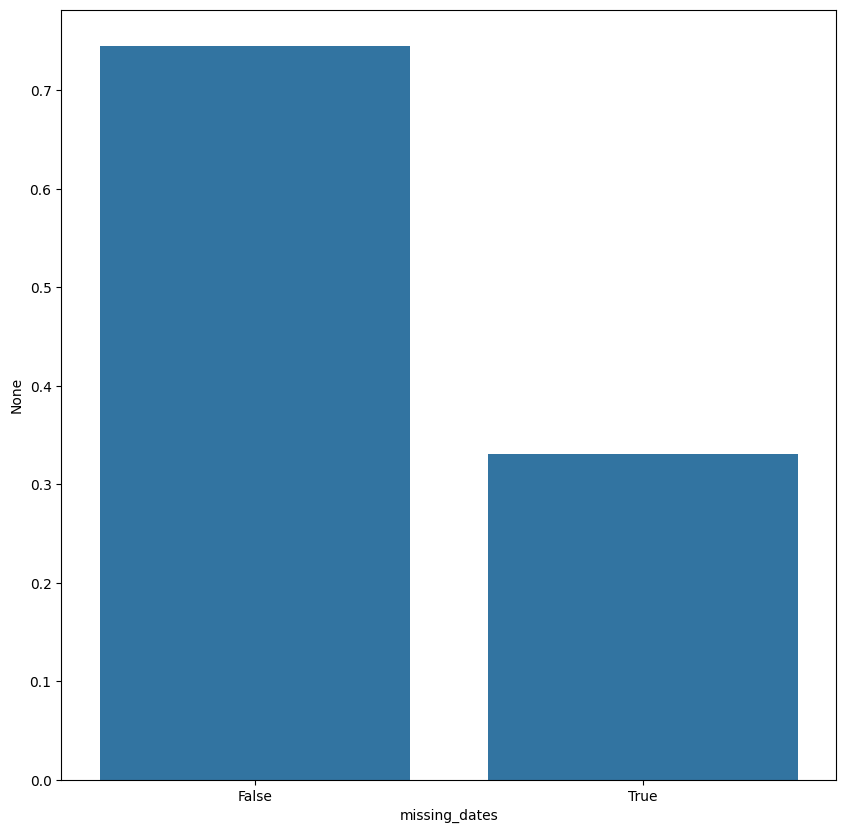

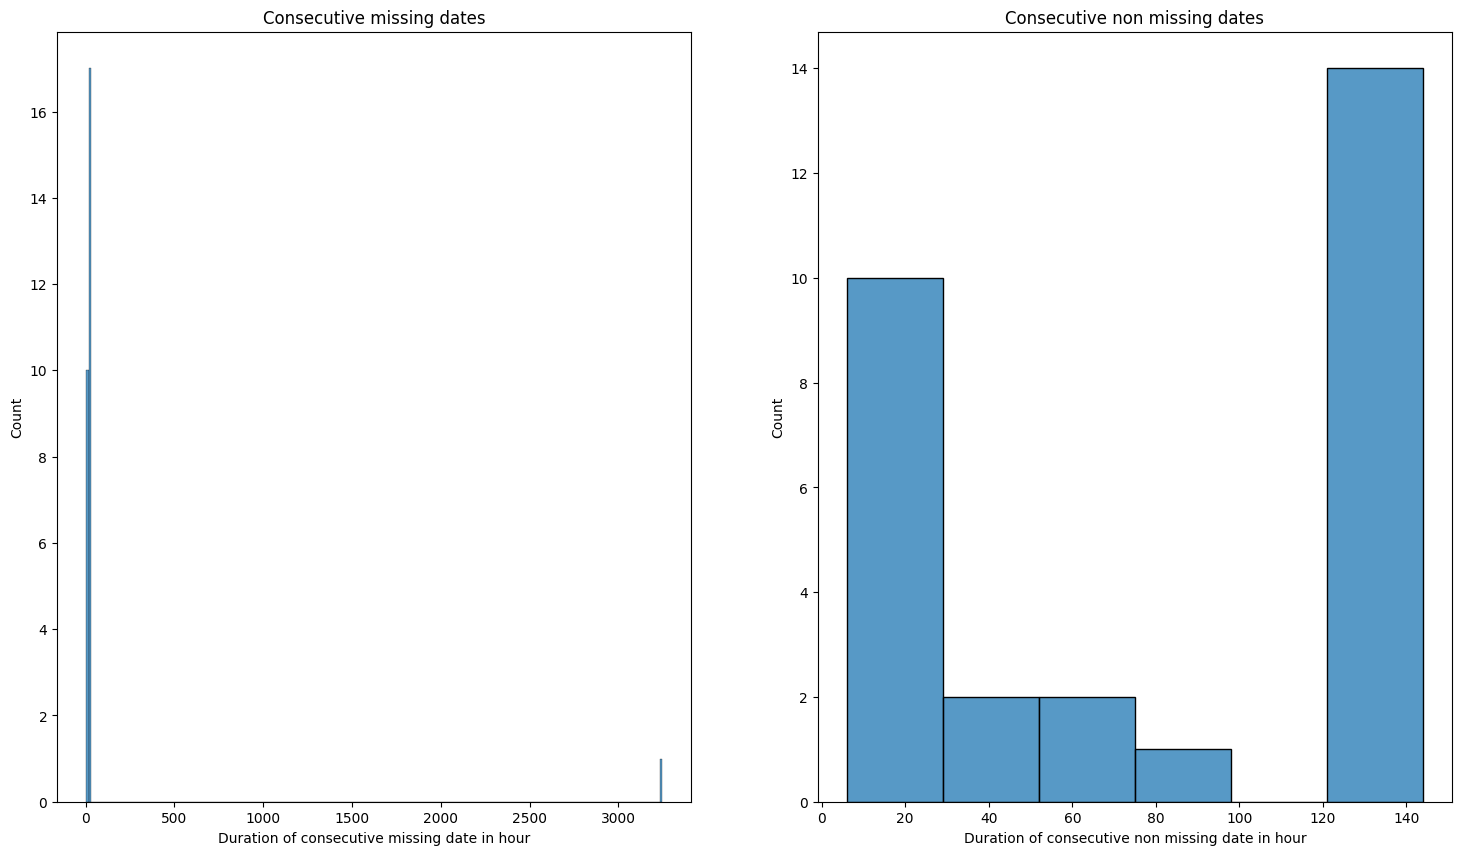

Missing values analysis for unit ['A2 DE PARC EOLIEN EN MER DE LA BAIE DE ST-BRIEUC']


/home/bender/Code/DridrM/personal_data_projects/renewable_energy_forecast/re_forecast/preprocessing/datetime.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df.loc[:, dt_column] = gen_df[dt_column].apply(handle_seasonal_time)


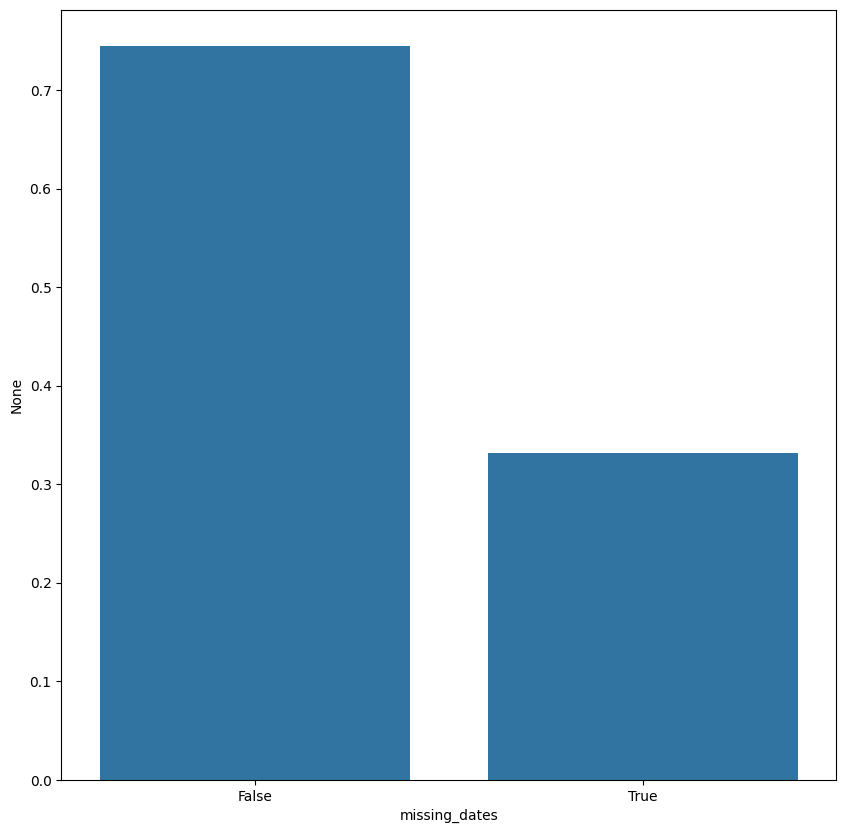

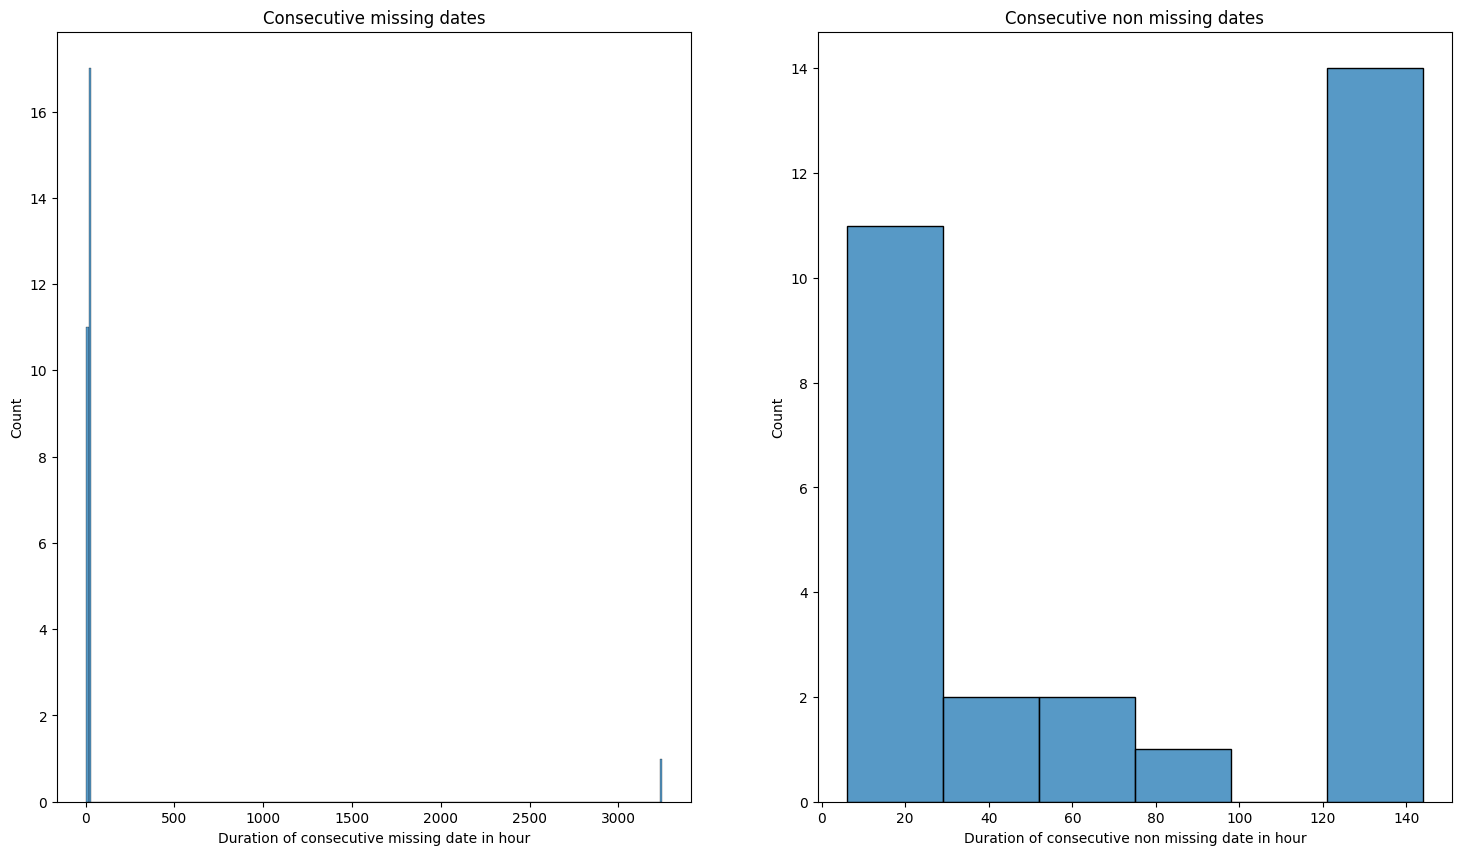

In [7]:
################################################################################
# 3/ Show missing datas characteristics for each wind offshore generation unit #
################################################################################

# Extract eic codes for wind offshore generation units
wind_production_types = ["WIND_ONSHORE", "WIND_OFFSHORE"]
eic_codes = ressource_2_units.loc[ressource_2_units["production_type"].isin(wind_production_types), "eic_code"]

# Iterate over the eic codes
for eic_code in eic_codes:
    # Filter data for the given eic code
    gen_data = ressource_2_gen_data.loc[ressource_2_gen_data["eic_code"] == eic_code, :]

    # Transform to datetime the datetime columns
    dt_columns_all = ["start_date", "end_date", "updated_date"]
    gen_data_dt = format_to_datetime(gen_data, dt_columns_all)

    # Compute the missing dates df
    missing_dates_df = check_dates_consistency(gen_data_dt, "start_date")

    # Print the generation unit
    print(f"Missing values analysis for unit {ressource_2_units.loc[ressource_2_units['eic_code'] == eic_code, 'name'].values[0]}")

    # Plot the repartition of missing and non missing datas
    plt.figure(figsize = (10, 10))
    sns.barplot(x = missing_dates_df["missing_dates"], y = missing_dates_df.index / len(missing_dates_df), errorbar = None)
    plt.show()

    # Plot the repartition of missing and non missing dates
    plot_consecutive_time_periods(gen_data_dt, "start_date")